# Measure 4 - FRET

Downloads: 
- Data available [here](https://scarsi.web.cern.ch/MISC/LBP/FRET/Data.rar)  
- This executable jupyter notebook available [here](https://scarsi.web.cern.ch/MISC/LBP/FRET/analisiFRET.ipynb)


In [1]:
import numpy as np
from matplotlib import pyplot as plt

import os

The worst way ever to load data:

In [2]:
ANS5ul_water_exc280nm = np.loadtxt("Data/ANS5ul_water_exc280nm.txt", skiprows = 4)
ANS5ul_water_exc350nm = np.loadtxt("Data/ANS5ul_water_exc350nm.txt", skiprows = 4)

PBS_L65W_F1000V_G1000_se1_sc3 = np.loadtxt("Data/PBS_L65W_F1000V_G1000_se1_sc3.txt", skiprows = 4)
TRP_ref_L65W_F1000V_G1000_se1_sc3 = np.loadtxt("Data/TRP_ref_L65W_F1000V_G1000_se1_sc3.txt", skiprows = 4)
TRP_sam_L65W_F1000V_G1000_se1_sc3 = np.loadtxt("Data/TRP_sam_L65W_F1000V_G1000_se1_sc3.txt", skiprows = 4)

TRP_5ulANS_sam_sameSettings = np.loadtxt("Data/TRP+5ulANS_sam_sameSettings.txt", skiprows = 4)
TRP_5ulPBS_ref_sameSettings = np.loadtxt("Data/TRP+5ulPBS_ref_sameSettings.txt", skiprows = 4)

TRP_10ulANS_sam_sameSettings = np.loadtxt("Data/TRP+10ulANS_sam_sameSettings.txt", skiprows = 4)
TRP_10ulPBS_ref_sameSettings = np.loadtxt("Data/TRP+10ulPBS_ref_sameSettings.txt", skiprows = 4)

TRP_15ulANS_sam_sameSettings = np.loadtxt("Data/TRP+15ulANS_sam_sameSettings.txt", skiprows = 4)
TRP_15ulANS_sam_sameSettings_03od = np.loadtxt("Data/TRP+15ulANS_sam_sameSettings_03od.txt", skiprows = 4)
TRP_15ulPBS_ref_sameSettings = np.loadtxt("Data/TRP+15ulPBS_ref_sameSettings.txt", skiprows = 4)
TRP_15ulPBS_ref_sameSettings_bis = np.loadtxt("Data/TRP+15ulPBS_ref_sameSettings_bis.txt", skiprows = 4)

TRP_30ulANS_sam_sameSettings = np.loadtxt("Data/TRP+30ulANS_sam_sameSettings.txt", skiprows = 4)
TRP_30ulANS_sam_sameSettings_03od = np.loadtxt("Data/TRP+30ulANS_sam_sameSettings_03od.txt", skiprows = 4)
TRP_30ulPBS_ref_sameSettings = np.loadtxt("Data/TRP+30ulPBS_ref_sameSettings.txt", skiprows = 4)
TRP_30ulPBS_ref_sameSettings_03od = np.loadtxt("Data/TRP+30ulPBS_ref_sameSettings_03od.txt", skiprows = 4)


Let's pack everything in a vector, in the worst way possible

In [3]:
vectOfData = (ANS5ul_water_exc280nm, ANS5ul_water_exc350nm, 
              PBS_L65W_F1000V_G1000_se1_sc3, TRP_ref_L65W_F1000V_G1000_se1_sc3, TRP_sam_L65W_F1000V_G1000_se1_sc3, 
              TRP_5ulANS_sam_sameSettings, TRP_5ulPBS_ref_sameSettings, 
              TRP_10ulANS_sam_sameSettings, TRP_10ulPBS_ref_sameSettings, 
              TRP_15ulANS_sam_sameSettings, TRP_15ulANS_sam_sameSettings_03od, TRP_15ulPBS_ref_sameSettings, TRP_15ulPBS_ref_sameSettings_bis, 
              TRP_30ulANS_sam_sameSettings, TRP_30ulANS_sam_sameSettings_03od, TRP_30ulPBS_ref_sameSettings, TRP_30ulPBS_ref_sameSettings_03od)

# Mi permette di ottenere la stringa della 
def namestr(obj, namespace):
    return [name for name in namespace if namespace[name] is obj]

Let's plot spectra

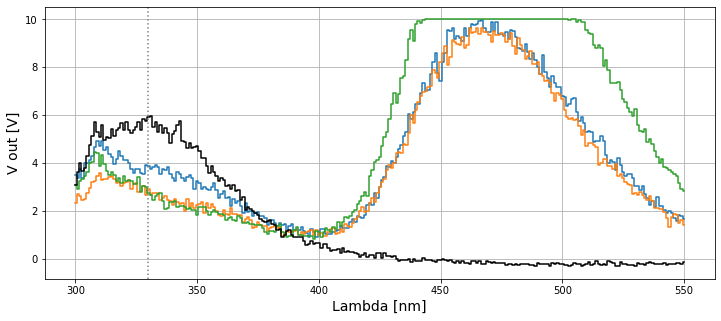

In [4]:
fig, ax = plt.subplots()
fig.set_size_inches(12,5)

ax.plot(TRP_5ulANS_sam_sameSettings[:,0], TRP_5ulANS_sam_sameSettings[:,1], ds="steps-mid" )
ax.plot(TRP_10ulANS_sam_sameSettings[:,0], TRP_10ulANS_sam_sameSettings[:,1], ds="steps-mid" )
ax.plot(TRP_15ulANS_sam_sameSettings[:,0], TRP_15ulANS_sam_sameSettings[:,1], ds="steps-mid" )
ax.plot(TRP_5ulPBS_ref_sameSettings[:,0], TRP_5ulPBS_ref_sameSettings[:,1], ds="steps-mid" , c="k")

ax.axvline(x=330, ls=":", c="grey")


ax.grid()
ax.set_xlabel("Lambda [nm]", fontsize = 14)
ax.set_ylabel("V out [V]", fontsize = 14)
plt.show()

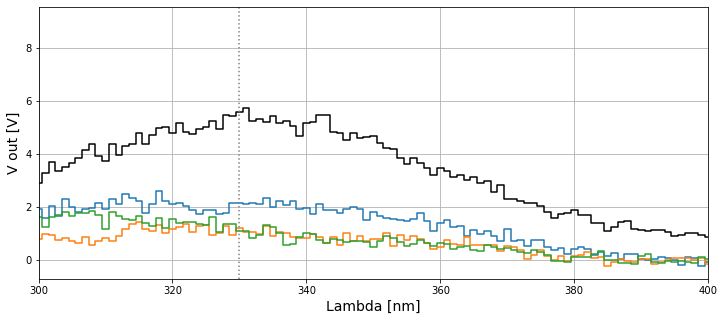

FRET Efficiency: 80.10 %


In [5]:
fig, ax = plt.subplots()
fig.set_size_inches(12,5)

condLambda = (TRP_5ulANS_sam_sameSettings[:,0] >= 390) & (TRP_5ulANS_sam_sameSettings[:,0] <= 400)

curva1 = TRP_5ulANS_sam_sameSettings[:,1]-PBS_L65W_F1000V_G1000_se1_sc3[:,1]
curva1 = curva1 - np.mean(curva1[condLambda])

curva2 = TRP_10ulANS_sam_sameSettings[:,1]-PBS_L65W_F1000V_G1000_se1_sc3[:,1]
curva2 = curva2 - np.mean(curva2[condLambda])

curva3 = TRP_15ulANS_sam_sameSettings[:,1]-PBS_L65W_F1000V_G1000_se1_sc3[:,1]
curva3 = curva3 - np.mean(curva3[condLambda])

curva4 = TRP_5ulPBS_ref_sameSettings[:,1]-PBS_L65W_F1000V_G1000_se1_sc3[:,1]
#curva4 = curva4 - np.mean(curva4[condLambda])




ax.plot(TRP_5ulANS_sam_sameSettings[:,0],  curva1, ds="steps-mid" )
ax.plot(TRP_10ulANS_sam_sameSettings[:,0], curva2 , ds="steps-mid" )
ax.plot(TRP_15ulANS_sam_sameSettings[:,0], curva3 , ds="steps-mid" )
ax.plot(TRP_5ulPBS_ref_sameSettings[:,0], curva4 , ds="steps-mid" , c="k")

ax.axvline(x=330, ls=":", c="grey")

ax.set_xlim((300, 400))


ax.grid()
ax.set_xlabel("Lambda [nm]", fontsize = 14)
ax.set_ylabel("V out [V]", fontsize = 14)
plt.show()

myIdx = np.nonzero(TRP_5ulANS_sam_sameSettings[:,0]>=330)[0][0]

rapporto = curva3[myIdx] / curva4[myIdx]

print(f"FRET Efficiency: {(1-rapporto)*100:.2f} %")

In [6]:
R0 = 35e-10
E = 1-rapporto

R = R0 * (1/E -1)**(1/6)
R

2.775167449237399e-09

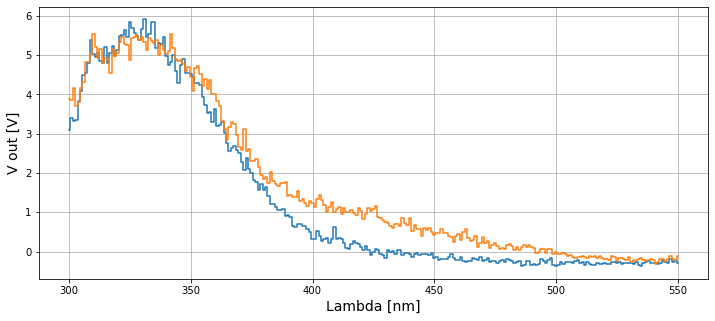

In [7]:
fig, ax = plt.subplots()
fig.set_size_inches(12,5)

ax.plot(TRP_ref_L65W_F1000V_G1000_se1_sc3[:,0], TRP_ref_L65W_F1000V_G1000_se1_sc3[:,1], ds="steps-mid" )
ax.plot(TRP_sam_L65W_F1000V_G1000_se1_sc3[:,0], TRP_sam_L65W_F1000V_G1000_se1_sc3[:,1], ds="steps-mid" )

ax.grid()
ax.set_xlabel("Lambda [nm]", fontsize = 14)
ax.set_ylabel("V out [V]", fontsize = 14)
plt.show()

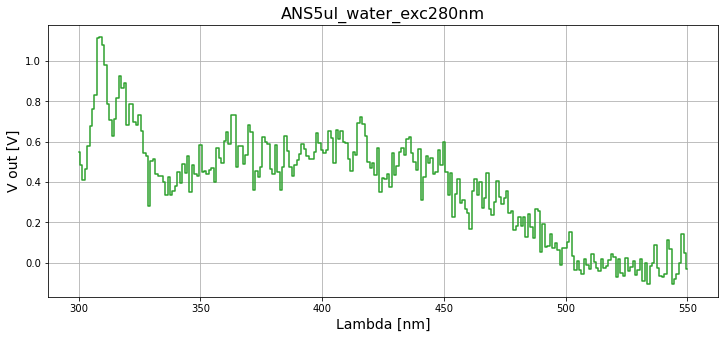

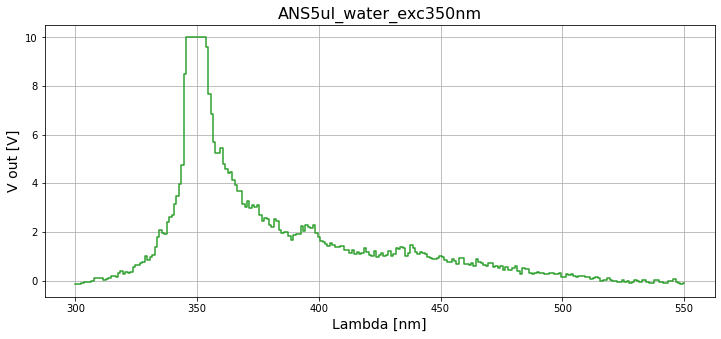

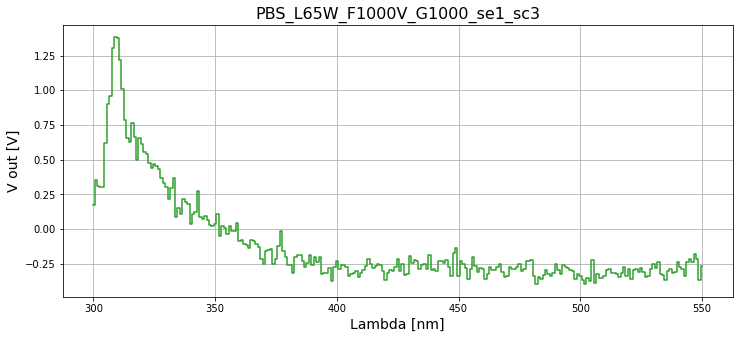

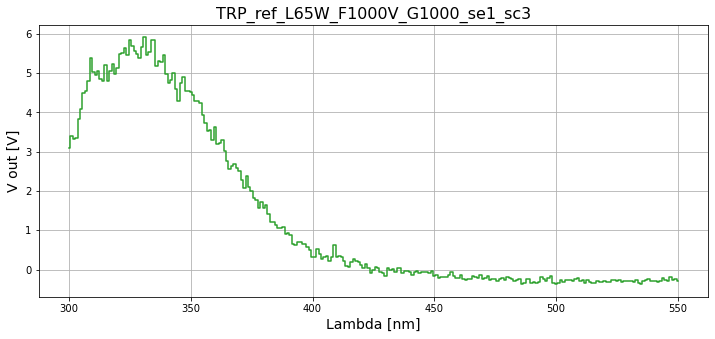

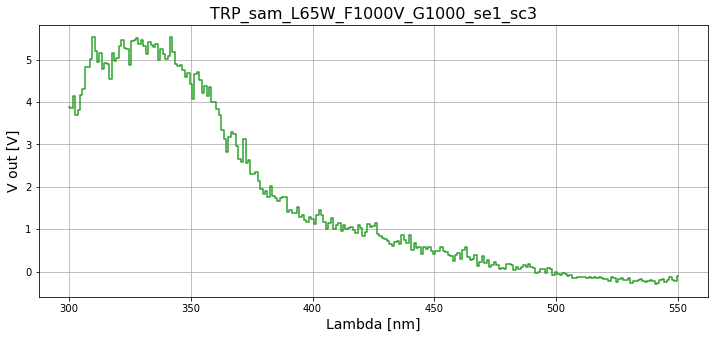

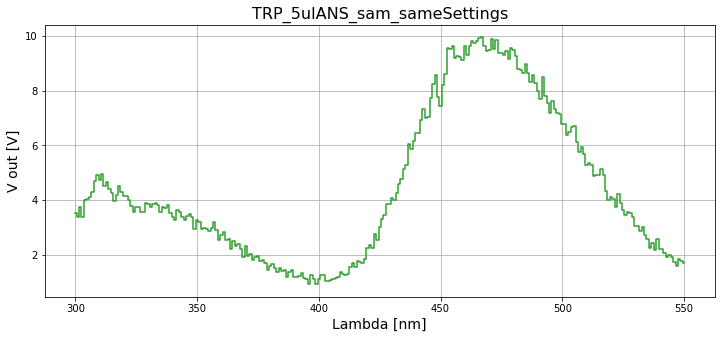

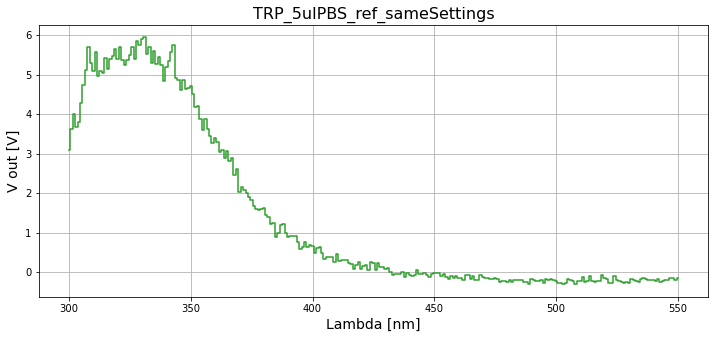

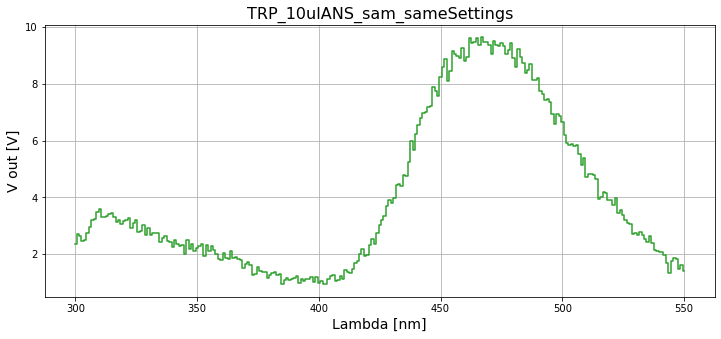

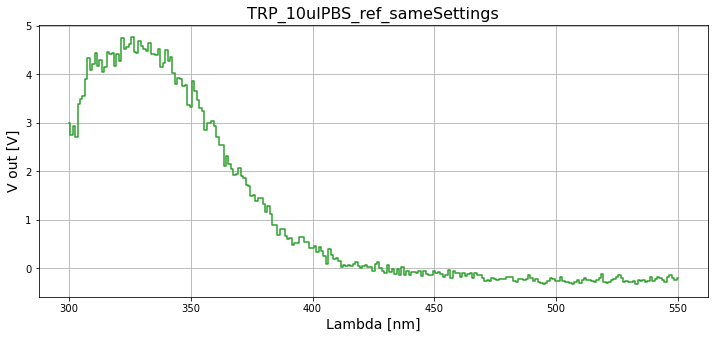

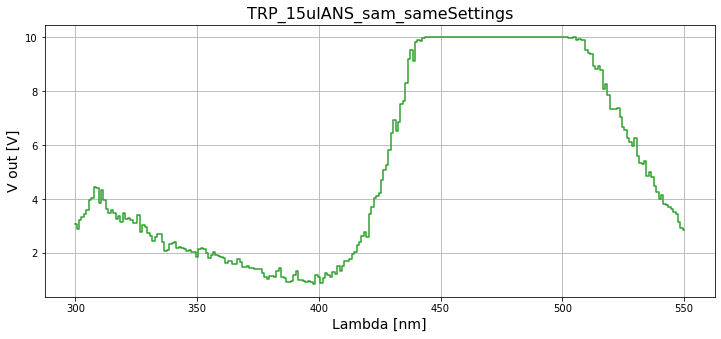

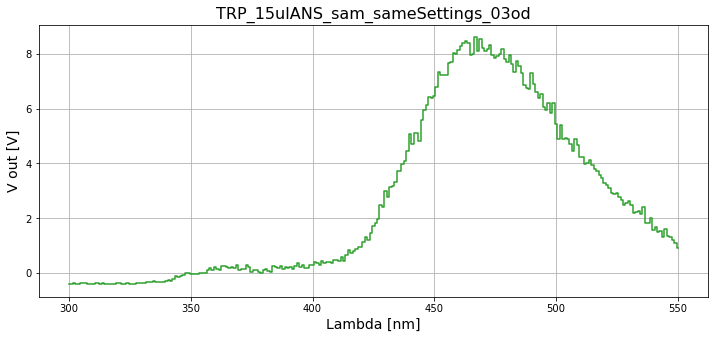

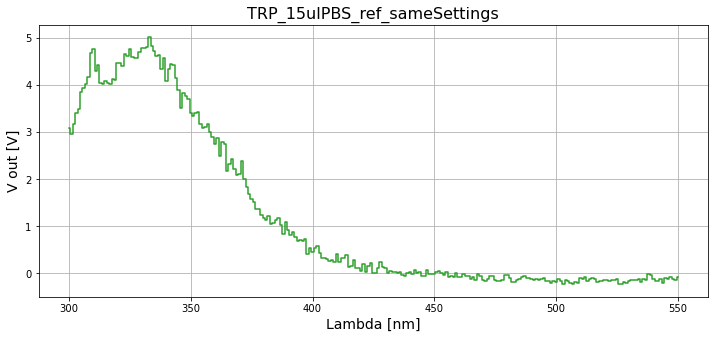

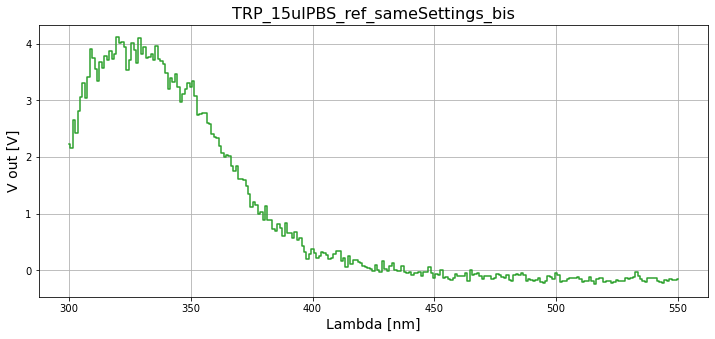

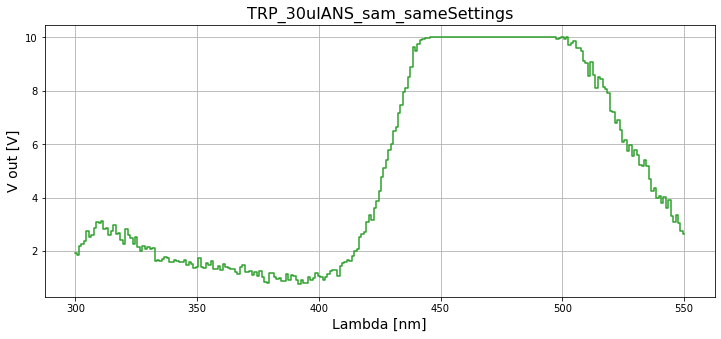

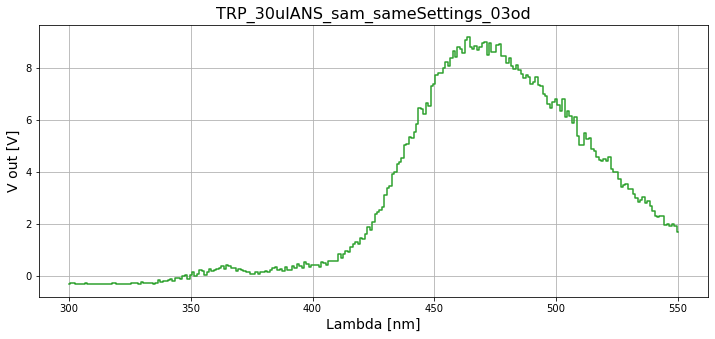

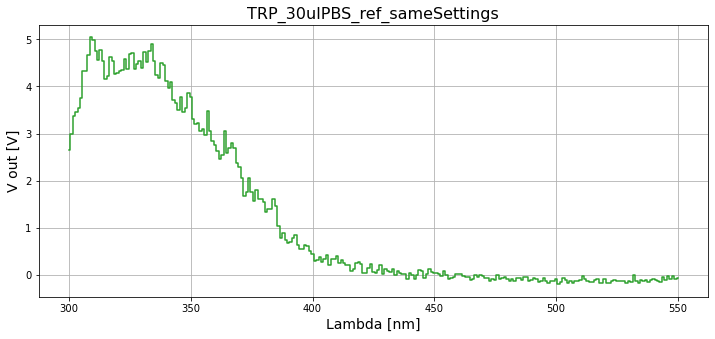

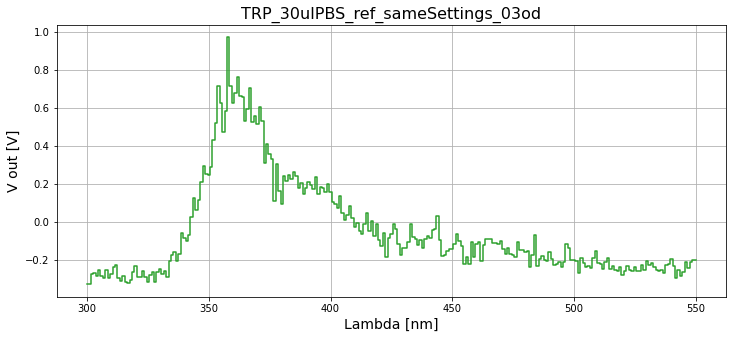

In [8]:
for i in vectOfData:
    fig, ax = plt.subplots()
    fig.set_size_inches(12,5)
    
    ax.plot(i[:,0], i[:,1], c = "tab:green", ds = "steps-mid")
    ax.set_title(f"{namestr(i, globals())[0]}", fontsize = 16)
    
    ax.grid()
    ax.set_xlabel("Lambda [nm]", fontsize = 14)
    ax.set_ylabel("V out [V]", fontsize = 14)
    
    plt.show()